In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [77]:
total_data=pd.read_csv('sample.csv')
total_data

,Test_Type,Trial_No,Pulse_current_A,Back_ground_current_A,Pulse_frequency_Hz,Pulse_on_percent,Yield_strength_Trial1_MPa,Yield_strength_Trial2_MPa,Yield_strength_Trial3_MPa,Yield_strength_Average_MPa,...,Elongation_Trial3_percent,Elongation_Average_percent,Impact_Strength_Trial1_J,Impact_Strength_Trial2_J,Impact_Strength_Trial3_J,Impact_Strength_Average_J,Micro_hardness_Trial1_Hv,Micro_hardness_Trial2_Hv,Micro_hardness_Trial3_Hv,Micro_hardness_Average_Hv
0,Tensile,1,180,100,4,40,347.76,330.55,344.65,340.98,...,27.23,28.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tensile,2,180,110,6,50,336.56,320.71,327.89,328.38,...,29.21,29.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tensile,3,180,120,8,60,332.80,324.19,338.91,331.96,...,28.87,28.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tensile,4,200,100,6,60,344.38,349.14,352.21,348.57,...,26.34,25.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tensile,5,200,110,8,40,334.22,318.42,337.82,330.15,...,27.36,28.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Tensile,6,200,120,4,50,346.43,323.47,332.40,334.10,...,30.89,31.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Tensile,7,220,100,8,50,360.80,354.96,346.10,353.95,...,30.65,29.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Tensile,8,220,110,6,60,336.76,356.75,361.82,351.77,...,30.17,30.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Tensile,9,220,120,4,40,346.32,350.07,355.21,350.53,...,30.12,30.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Impact,1,180,100,4,40,NaN,NaN,NaN,NaN,...,NaN,NaN,104.0,100.0,96.0,100.0,NaN,NaN,NaN,NaN


In [78]:
tensile_df=total_data[total_data['Test_Type']=='Tensile'].copy()
impact_df=total_data[total_data['Test_Type']=='Impact'].copy()
hardness_df=total_data[total_data['Test_Type']=='Microhardness'].copy()

In [79]:
tensile_df=tensile_df.dropna(axis=1,how='any')
impact_df=impact_df.dropna(axis=1,how='any')
hardness_df=hardness_df.dropna(axis=1,how='any')


In [80]:
impact_df

,Test_Type,Trial_No,Pulse_current_A,Back_ground_current_A,Pulse_frequency_Hz,Pulse_on_percent,Impact_Strength_Trial1_J,Impact_Strength_Trial2_J,Impact_Strength_Trial3_J,Impact_Strength_Average_J
9,Impact,1,180,100,4,40,104.0,100.0,96.0,100.0
10,Impact,2,180,110,6,50,103.0,99.0,104.0,102.0
11,Impact,3,180,120,8,60,116.0,109.0,118.0,114.0
12,Impact,4,200,100,6,60,117.0,106.0,116.0,113.0
13,Impact,5,200,110,8,40,106.0,94.0,104.0,101.0
14,Impact,6,200,120,4,50,104.0,110.0,101.0,105.0
15,Impact,7,220,100,8,50,107.0,115.0,111.0,111.0
16,Impact,8,220,110,6,60,117.0,119.0,118.0,118.0
17,Impact,9,220,120,4,40,98.0,102.0,106.0,102.0


In [ ]:
features = ['Pulse_current_A', 'Back_ground_current_A', 
            'Pulse_frequency_Hz', 'Pulse_on_percent']   ## indepedednt features

targets = {
    'tensile': 'Ultimate_tensile_strength_Average_MPa',
    'impact': 'Impact_Strength_Average_J', 
    'hardness': 'Micro_hardness_Average_Hv'
}

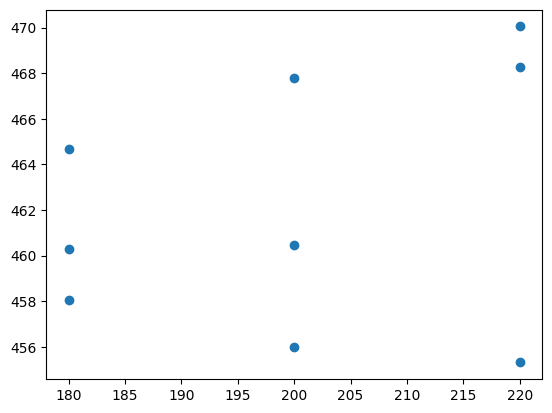

In [101]:
plt.scatter(x=tensile_df['Pulse_current_A'],y=tensile_df['Ultimate_tensile_strength_Average_MPa'])

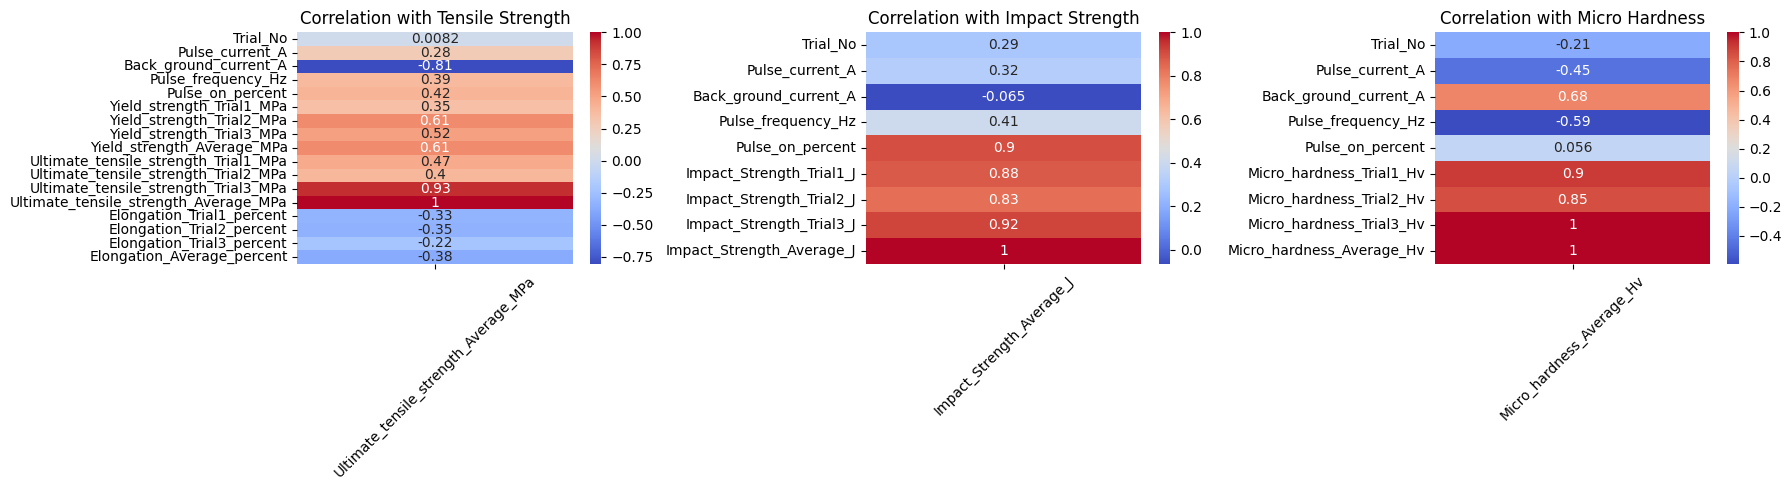

In [82]:
plt.figure(figsize=(18,5))

# Subplot 1 - Tensile Strength
plt.subplot(1,3,1)
corr = tensile_df.select_dtypes(include=['number']).corr()
sns.heatmap(corr[['Ultimate_tensile_strength_Average_MPa']], annot=True, cmap='coolwarm')
plt.title("Correlation with Tensile Strength")
plt.xticks(rotation=45)

# Subplot 2 - Impact Strength
plt.subplot(1,3,2)
corr = impact_df.select_dtypes(include=['number']).corr()
sns.heatmap(corr[['Impact_Strength_Average_J']], annot=True, cmap='coolwarm')
plt.title("Correlation with Impact Strength")
plt.xticks(rotation=45)

# Subplot 3 - Micro Hardness
plt.subplot(1,3,3)
corr = hardness_df.select_dtypes(include=['number']).corr()
sns.heatmap(corr[['Micro_hardness_Average_Hv']], annot=True, cmap='coolwarm')
plt.title("Correlation with Micro Hardness")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data=[('tensile',tensile_df),('impact',impact_df),('hardness',hardness_df)]
models={}

for test,data in data:
    x=data[features]
    y=data[targets[test]]
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
    
    scaler=StandardScaler()
    x_train=scaler.fit_transform(x_train)
    x_test=scaler.transform(x_test)
    
    model=LinearRegression()
    model.fit(x_train,y_train)
    
    score=model.score(x_test,y_test)
    models[test]=model
    print(f"{test.title()} model accuracy is: {score:.2%}")

Tensile model accuracy is: 67.74%
Impact model accuracy is: 79.11%
Hardness model accuracy is: 94.51%


In [84]:
tensile_df[tensile_df['Trial_No']==5]['Pulse_current_A'].values[0]


np.int64(200)

## Multi Object Optimization

In [85]:
best_score=0
best_choice=None
best_result={}

for trial in range(1,10):
    values=[
        tensile_df[tensile_df['Trial_No']==trial]['Pulse_current_A'].values[0],
        tensile_df[tensile_df['Trial_No']==trial]['Back_ground_current_A'].values[0],
        tensile_df[tensile_df['Trial_No']==trial]['Pulse_frequency_Hz'].values[0],
        tensile_df[tensile_df['Trial_No']==trial]['Pulse_on_percent'].values[0]
    ]
    
    tensile_result = tensile_df[tensile_df['Trial_No'] == trial]['Ultimate_tensile_strength_Average_MPa'].values[0]
    impact_result = impact_df[impact_df['Trial_No'] == trial]['Impact_Strength_Average_J'].values[0]
    hardness_result = hardness_df[hardness_df['Trial_No'] == trial]['Micro_hardness_Average_Hv'].values[0]
    
    score=(tensile_result*0.4 +impact_result*0.3 + hardness_result*0.3)
    
    if(score>best_score):
        best_score=score
        best_choice=values
        best_result['tensile']=tensile_result
        best_result['impact']=impact_result
        best_result['hardness']=hardness_result

In [86]:
best_choice

[np.int64(220), np.int64(110), np.int64(6), np.int64(60)]

In [87]:
best_result

{'tensile': np.float64(468.28),
 'impact': np.float64(118.0),
 'hardness': np.float64(199.0)}

In [88]:
best_score

np.float64(282.41200000000003)

In [89]:
for trial_number in range(1, 10):
    tensile = tensile_df[tensile_df['Trial_No'] == trial_number]['Ultimate_tensile_strength_Average_MPa'].values[0]
    impact = impact_df[impact_df['Trial_No'] == trial_number]['Impact_Strength_Average_J'].values[0]
    hardness = hardness_df[hardness_df['Trial_No'] == trial_number]['Micro_hardness_Average_Hv'].values[0]
    overall = tensile * 0.4 + impact * 0.3 + hardness * 0.3
    
    print(f"{trial_number:5} | {tensile:7.1f} | {impact:6.1f} | {hardness:7.1f} | {overall:7.1f}")

    1 |   464.7 |  100.0 |   201.0 |   276.2
    2 |   458.1 |  102.0 |   202.0 |   274.4
    3 |   460.3 |  114.0 |   204.0 |   279.5
    4 |   467.8 |  113.0 |   200.0 |   281.0
    5 |   460.4 |  101.0 |   197.0 |   273.6
    6 |   456.0 |  105.0 |   207.0 |   276.0
    7 |   470.1 |  111.0 |   189.0 |   278.0
    8 |   468.3 |  118.0 |   199.0 |   282.4
    9 |   455.3 |  102.0 |   203.0 |   273.6


## Visualization


In [90]:
plt.figure(figsize=(10,6))
trial=list(range(1,10))
t_scores=[tensile_df[tensile_df['Trial_No']==i]['Ultimate_tensile_strength_Average_MPa'].values[0] for i in trial]
i_scores=[impact_df[impact_df['Trial_No'] == i]['Impact_Strength_Average_J'].values[0] for i in trial]
h_scores=[hardness_df[hardness_df['Trial_No'] == trial]['Micro_hardness_Average_Hv'].values[0] for i in trial]

total_scores=[t*0.4+i*0.3+h*0.3 for t,i,h in zip(t_scores,i_scores,h_scores)]

<Figure size 1000x600 with 0 Axes>

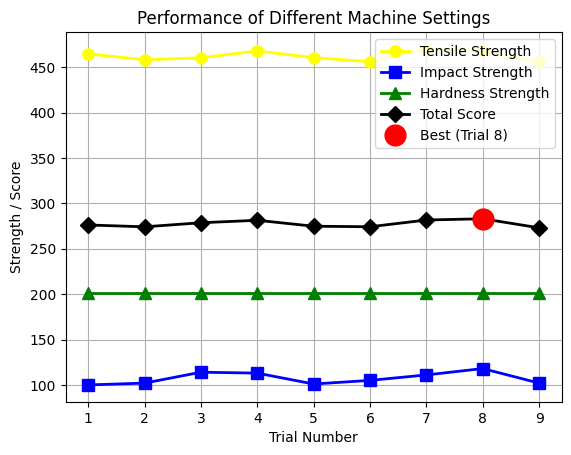

In [99]:
plt.plot(trial,t_scores,'o-',label='Tensile Strength',linewidth=2,markersize=8,color='yellow')
plt.plot(trial,i_scores,'s-',label='Impact Strength',linewidth=2,markersize=8,color='blue')
plt.plot(trial,h_scores,'^-',label='Hardness Strength',linewidth=2,markersize=8,color='green')
plt.plot(trial,total_scores,'D-',label='Total Score',linewidth=2,markersize=8,color='black')

best_trial=total_scores.index(max(total_scores))+1
plt.plot(best_trial,max(total_scores),'o',label=f'Best (Trial {best_trial})',linewidth=2,markersize=15,color='red')

plt.xlabel('Trial Number')
plt.ylabel('Strength / Score')
plt.title('Performance of Different Machine Settings')
plt.legend()
plt.grid(True)
plt.xticks(trial)
plt.show()